# Equações diferenciais ordinárias

Equações diferenciais que têm somente uma variável independente são chamadas de equações diferenciais ordinárias (EDOs). Todas as outras variáveis são funções desta variável independente. As EDOs mais simples são as de primeira ordem, que envolvem apenas derivadas primeiras, por exemplo

$$
\frac{\mathrm{d}x}{\mathrm{d}t} = \frac{2x}{t}.
$$

Esta equação em particular pode ser resolvida analiticamente pelo método da separação de variáveis, resultando numa classe de funções $x(t)$, chamada solução geral. Uma solução particular pode ser escolhida quando forçamos condições iniciais ou de contorno. Por exemplo, uma partícula livre com velocidade $v$ em uma dimensão tem a sua posição descrita pela equação

$$
\frac{\mathrm{d}x}{\mathrm{d}t} = v.
$$

A sua solução geral é

$$
x(t) = x_0 + v (t - t_0),
$$

onde $x_0$ é a posição no instante $t_0$. Se conhecemos a posição da partícula em $t_0 = 0$, temos uma solução particular, dadas as condições iniciais. Trataremos aqui apenas de problemas de condições iniciais.

Nem toda EDO pode ser resolvida analiticamente. EDOs como

$$
\frac{\mathrm{d}x}{\mathrm{d}t} = \frac{2x}{t} + \frac{3x^2}{t^3}
$$

não são separáveis, e além do mais são não-lineares, pois incluem variáveis com potências diferentes de 1. EDOs não-lineares raramente têm solução analítica, mas podem ser resolvidas numericamente. Veremos alguns métodos para resolver problemas com condições iniciais.

## Método de Euler

Este é o método mais simples de todos. É também o mais impreciso, mas tem o seu valor didático. Considere a EDO

$$
\frac{\mathrm{d}x}{\mathrm{d}t} = f(x, t).
$$

Queremos encontrar $x(t)$, e para isso precisamos de condições iniciais. Suponha que conhecemos $x$ em um determinado $t$. Sabendo este valor de $x(t)$, podemos escrever o valor de $x$ depois de um intervalo pequeno $h$ usando uma expansão de Taylor, isto é,

$$
x(t+h) = x(t) + h \frac{\mathrm{d}x}{\mathrm{d}t} + \frac{1}{2} h^2\frac{\mathrm{d}^2x}{\mathrm{d}t^2} + \ldots
$$

Como a derivada de $x(t)$ é dada pela EDO, temos que

\begin{align}
x(t+h) &= x(t) + h f(x,t) + \frac{1}{2} h^2\frac{\mathrm{d}}{\mathrm{d}t}f(x,t) + \ldots \\
&= x(t) + h f(x,t) + O(h^2),
\end{align}

onde $O(h^2)$ inclui os termos proporcionais a $h^2$ e potências mais altas. Se $h$ é muito pequeno, podemos desprezar os termos em $h^2$ e ficar com

$$
x(t+h) \cong x(t) + h f(x,t).
$$

Esta equação resume o método de Euler. Se sabemos o valor de $x$ em um tempo $t$, é possível calcular o valor de $x$ para um intervalo $h$ imediatamente depois. Podemos então repetir o processo e calcular $x$ depois de outro intervalo $h$, e assim sucessivamente. Não conseguimos $x(t)$ para todos os valores de $t$, apenas valores igualmente espaçados por $h$ (ou outros valores discretos, se $h$ não for fixo). A solução numérica pode ser uma aproximação tão boa quanto desejarmos, tomando um $h$ suficientemente pequeno.

### Discretizando a EDO

Considere como exemplo a EDO

$$
\frac{\mathrm{d}x}{\mathrm{d}t} = - x^3 + \sin t,
$$

com a condição inicial de que $x=0$ em $t=0$. Vamos calcular a solução no intervalo de $0 \leq t \leq 10$, em 1000 passos. Neste caso, primeiro precisamos determinar o valor de $h$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'

In [28]:
# Condições iniciais
x0 = 0.0
t0 = 0.0
tf = 10.0

# Passo de tempo
N = 1000
h = (tf - t0) / N
print(f'h = {h}')

h = 0.01


Vamos então aplicar o método de Euler. Precisamos de um local para armazenar os 1000 valores de $t$ e os respectivos $x(t)$. As condições iniciais são definidas nos primeiros elementos de `x` e `t`.

In [29]:
t = np.zeros(N)
t[0] = t0
x = np.zeros(N)
x[0] = x0

Precisamos discretizar a EDO. Se iniciamos em $t=t_0$, no passo seguinte temos $t_1 = t_0 + h$, depois $t_2 = t_1 + h = t_0 + 2 h$, e assim sucessivamente, até que depois de $j$ passos temos

\begin{align}
t_j &= t_0 + j h, \quad j=0,1,2,\ldots
\end{align}

Vamos também definir

\begin{align}
x_j &= x(t_j).
\end{align}

Veja que

\begin{align}
t_j + h &= t_0 + j h + h \\
&= t_0 + (j+1) h \\
&= t_{j+1},
\end{align}

logo, escrevendo o método de Euler em um instante $t_j$,

\begin{align}
x(t_j + h) &= x(t_j) + h f\left(x(t_j), t_j\right) \\
\implies x_{j+1} &= x_j + h f(x_j, t_j).
\end{align}

A cada passo, precisamos calcular as seguintes quantidades:

\begin{align}
t_{j+1} &= t_0 + (j + 1) h \\
x_{j+1} &= x_j + h f(x_j, t_j).
\end{align}

Veja que o valor seguinte $x_{j+1}$ depende apenas dos valores anteriores $x_j$ e $t_j$. Chamamos métodos deste tipo de *métodos diretos*.

#### Exercício 1

**a.** Defina $f(x, t)$ como uma função python. Em seguida, aplique o método de Euler para encontrar os valores de $x_j$, usando os arrays `x` e `t`, já definidos acima com a condição inicial.

In [30]:
def f(x,t):
    return -x**3 + np.sin(t)

for j in range(1,N):
    x[j] = x[j-1] + h*f(x[j-1],t[j-1])
    t[j] = t[0] + (j)*h

**b.** Faça o o gráfico da solução $x(t)$.

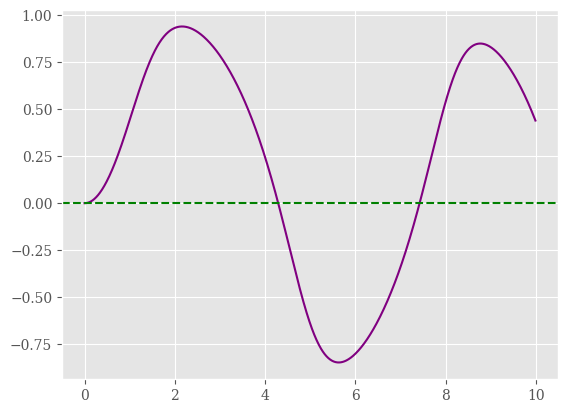

In [31]:
fig, ax = plt.subplots(1,1)

ax.plot(t,x, color = "purple")
ax.axhline(0,0, ls = "--", color = "green")

### Dinâmica newtoniana

O método de Euler pode ser usado para fazer simulações de dinâmica. Considere uma partícula de massa $m$ sujeita a uma força $F(x, v, t)$. O movimento da partícula é dado pelas equações

\begin{cases}
&\dfrac{\mathrm{d}v}{\mathrm{d}t} = f_v(x, v, t) = \dfrac{F(x, v, t)}{m}, \\
&\dfrac{\mathrm{d}x}{\mathrm{d}t} = f_x(x, v, t) = v.
\end{cases}

Estas são duas EDOs acopladas. Neste caso, $v$ e $x$ são funções de $t$, e devem ser resolvidas simultaneamente. A função $f_v(x, v, t)$ é porporcional à força, que pode realmente depender da posição, da velocidade e do tempo. A função $f_x(x, v, t)$, no entanto, é simplesmente a velocidade. Discretizando,

\begin{align}
v_{j+1} &= v_j + h f_v(x_j, v_j, t_j) \\
x_{j+1} &= x_j + h v_j.
\end{align}

Vejamos primeiro o caso de uma partícula livre, sem a ação de forças. Neste caso, $F(x, v, t) = 0$, logo,

\begin{align}
\frac{\mathrm{d}v}{\mathrm{d}t} &= f_v(x, v, t) = \frac{F(x, v, t)}{m} = 0, \\
\implies v &= v_0 (\text{constante}).
\end{align}

Na forma discretizada,

\begin{align}
v_{j+1} &= v_j + h f_v(x_j, v_j, t_j) \\
v_{j+1} &= v_j + h \times 0 \\
v_{j+1} &= v_j.
\end{align}

Como esperado, o a velocidade não muda de um passo pro outro.

Já conhecemos a solução de $v$, só falta resolver $x(t)$. Vimos acima a solução analítica, $x$ é linear. Vamos ver como esta EDO se comporta com o método de Euler. Discretizando,

\begin{align}
x_{j+1} &= x_j + h v_j \\
x_{j+1} &= x_j + h v_0. \\
\end{align}

De fato, o incremento é sempre proporcional ao passo de tempo, logo $x_j$ cresce linearmente com $t_j$.

Vamos resolver a EDO com condições iniciais $x_0=0$ e $v_0 = 10$ em $t_0 = 0$.

In [32]:
t0 = 0.0
x0 = 0.0
v0 = 10.0

Precisamos definir $f_v(x, v, t)$. No caso da partícula livre, seu valor é sempre zero.

In [33]:
def f_v(x, v, t):
    return 0.0

Vamos calcular $N=100$ passos de intervalo $h = 0.1$.

In [34]:
h = 0.1
N = 100

# Armazenamento da solução
t = np.zeros(N)
x = np.zeros(N)
v = np.zeros(N)

# Valor inicial
t[0] = t0
x[0] = x0
v[0] = v0

Finalmente podemos aplicar o método de Euler.

In [35]:
# Método de Euler
for j in range(N - 1):
    t[j + 1] = t0 + (j + 1) * h
    v[j + 1] = v[j] + h * f_v(x[j], v[j], t[j])
    x[j + 1] = x[j] + h * v[j]

Por outro lado, a solução analítica é simplesmente

$$
x(t) = x_0 + v_0 t.
$$

Calculando,

In [36]:
x_a = np.zeros(N)
for j in range(N):
    x_a[j] = x0 + v0 * t[j]

O gráfico das soluções numérica e analítica é

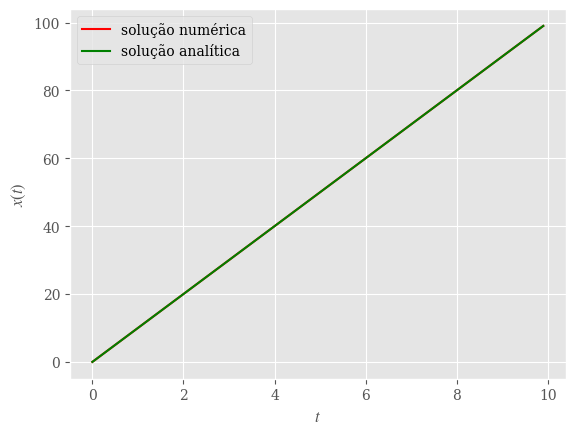

In [37]:
fig, ax = plt.subplots()
ax.plot(t, x, 'r-', label='solução numérica')
ax.plot(t, x_a, 'g-', label='solução analítica')
ax.set_xlabel('$t$')
ax.set_ylabel('$x(t)$')
ax.legend()
plt.show()

Como esperado, as duas soluções são virtualmente idênticas, fora erros numéricos da ordem de $10^{-15}$.

#### Exercício 2: oscilador harmônico

Agora que sabemos aplicar o método de Euler, vamos para um sistema um pouco mais complexo: um oscilador harmônico. Seja uma massa $m$ ligada a uma mola com constante elática $k$, tal que $F = -kx$. As equações de movimento ficam

\begin{cases}
&\dfrac{\mathrm{d}v}{\mathrm{d}t} = - \dfrac{k}{m} x\\
&\dfrac{\mathrm{d}x}{\mathrm{d}t} = v.
\end{cases}

**a.** Resolva o problema para $k=1$, $m=1$, com condições iniciais $x_0=1$, $v_0=0$ em $t_0=0$. Calcule $N = 100$ passos até $t = 10$.

In [82]:
k = 1
m = 1

x0 = 1
v0 = 0
t0 = 0
tf = 10

# Passos
N = 1000000
h = (tf-t0)/N

t = np.zeros(N)
x = np.zeros(N)
v = np.zeros(N)

t[0] = t0
v[0] = v0
x[0] = x0

omega = np.sqrt(k/m)

In [83]:
def f(x):
    return (-k/m)*x

for j in range(N - 1):
    t[j+1] = t[0] + h*(j+1)
    v[j+1] = v[j] + h*f(x[j])
    x[j+1] = x[j] + h*v[j]

**b.** A solução analítica deste oscilador, com estas condições iniciais, é

\begin{align}
x(t) = x_0 \cos \omega t, \\
\omega = \sqrt{\frac{k}{m}} .
\end{align}

Calcule a solução analítica para os pontos $t_j$ usados na solução numérica.

In [84]:
x_ana = np.zeros(N)

for i in range(N):
    x_ana[i] = x[0]*np.cos(omega*t[i])

**c.** Faça o gráfico da solução numérica e da solução analítica.

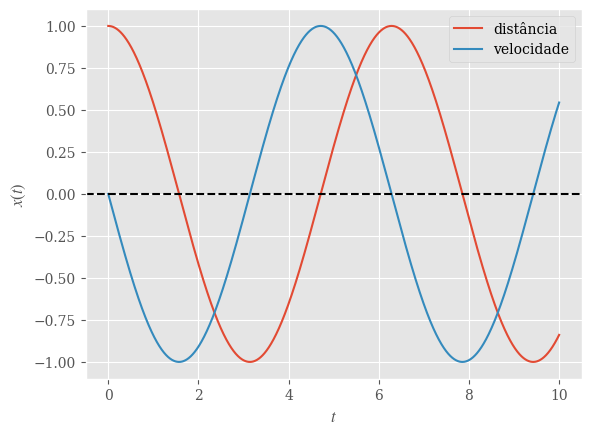

In [85]:
fig, ax = plt.subplots(1,1)

ax.plot(t,x, label = "distância")
ax.plot(t,v, label = "velocidade")
ax.axhline(0,0, ls = "--", color = "black")
ax.set_xlabel("$t$")
ax.set_ylabel("$x(t)$")
ax.legend()

C:\Users\pedri\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\pedri\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


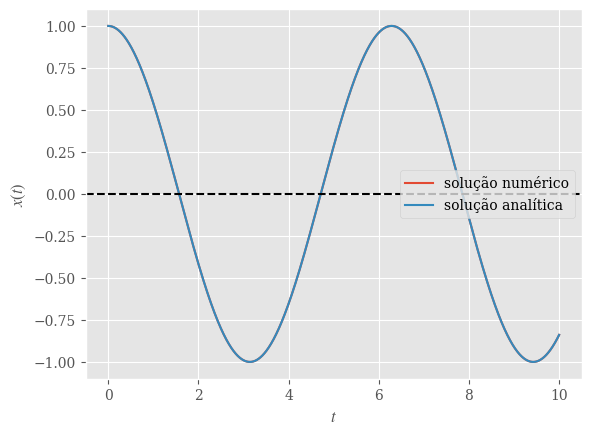

In [86]:
fig, ax = plt.subplots(1,1)

ax.plot(t,x, label = "solução numérico")
ax.plot(t,x_ana, label = "solução analítica")
ax.axhline(0,0, ls = "--", color = "black")
ax.set_xlabel("$t$")
ax.set_ylabel("$x(t)$")
ax.legend()

Se tudo correu bem, e você usou os valores sugeridos, poderá ver que o método de Euler funciona muito bem no começo, até $t \approx 2$. Porém, conforme os passos aumentam, a diferença entre o resultado numérico e o analítico começa a ficar maior. Modifique `N` e `tf` no seu código, e veja como a diferença crescre cada vez mais com o intervalo total de tempo, e diminui com `N`.

#### Exercício 3

Considere um projétil em queda livre, que parte do solo com velocidade $v_0 = 25$ positiva, num movimento apenas na linha vertical. Calcule numericamente a trajetória do projétil em $0 < t < 6$, e compare com a trajetória analítica. Use o intervalo de tempo $h = 0.1$, depois teste valores até obter resultados satisfatórios.

In [118]:
z0 = 0
v0 = 25
t0 = 0
tf = 6

h = 0.1
N = int((tf-t0)/h)

t = np.zeros(N)
z = np.zeros(N)
v = np.zeros(N)

t[0] = t0
v[0] = v0
z[0] = z0

g = 9.8

for j in range(N-1):
    t[j+1] = t[0] + h *(j+1)
    z[j+1] = z[j] + h * v[j]
    v[j+1] = v[j] - h * g

z_ana = np.zeros(N)
for i in range(N):
    z_ana[i] = v0*t[i] - g*0.5*t[i]**2

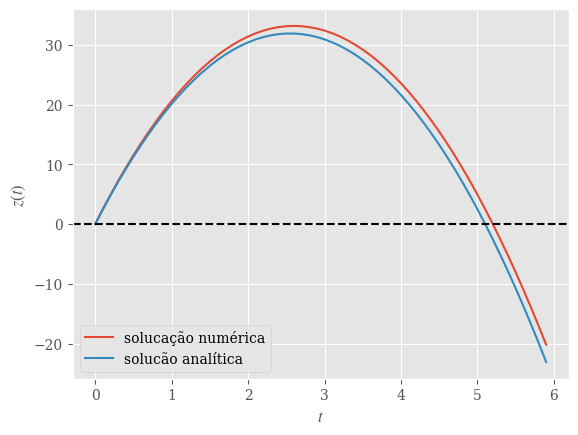

In [123]:
fig, ax = plt.subplots(1,1)

ax.plot(t,z, label = "solucação numérica")
ax.plot(t,z_ana, label = "solucão analítica")
ax.axhline(0,0, ls = "--", color = "black")
ax.set_xlabel("$t$")
ax.set_ylabel("$z (t)$")
ax.legend()